<a href="https://colab.research.google.com/github/qonca/traditional_ml/blob/main/training_deep_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

tf.keras.layers.Dense(10, activation = 'relu', kernel_initializer = 'he_normal')

<Dense name=dense, built=False>

# Leaky ReLu

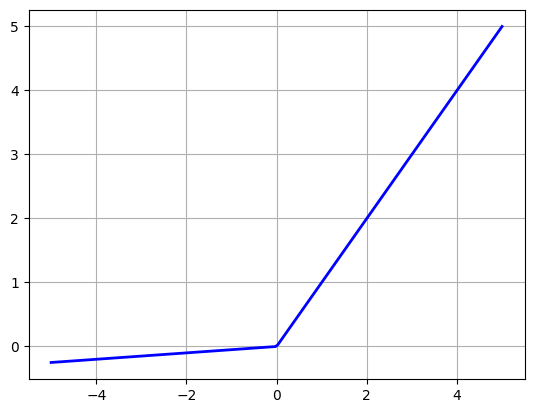

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(z,alpha = 0.01):
    return np.maximum(alpha*z, z)

z = np.linspace(-5,5,200)

plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth = 2, label = "Leaky Relu")
plt.grid()#hazir varianti var

In [ ]:
leaky_relu = tf.keras.layers.LeakyReLU(negative_slope = 0.01)
tf.keras.layers.Dense(10, activation = leaky_relu, kernel_initializer = 'he_normal')

<Dense name=dense_1, built=False>

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'leaky_relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.LeakyReLU()#hyperparamater teyin etmek olur
])

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train/255.0, X_valid/ 255.0, X_test/ 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
fashion_mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape =[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation = 'leaky_relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(100, kernel_initializer ='he_normal'),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dense(10, activation = 'softmax', kernel_initializer = 'glorot_normal')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 10,
          validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4951 - loss: 1.6773 - val_accuracy: 0.7136 - val_loss: 0.9030
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7204 - loss: 0.8602 - val_accuracy: 0.7666 - val_loss: 0.7178
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7706 - loss: 0.7103 - val_accuracy: 0.7856 - val_loss: 0.6394
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7903 - loss: 0.6411 - val_accuracy: 0.8012 - val_loss: 0.5904
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8078 - loss: 0.5940 - val_accuracy: 0.8100 - val_loss: 0.5632
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8127 - loss: 0.5682 - val_accuracy: 0.8172 - val_loss: 0.5385
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8210 - loss: 0.5395 - val_accuracy: 0.8232 - val_loss: 0.5196
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8250 - loss: 0.52

#ELU

In [ ]:
tf.keras.layers.Dense(10, activation = 'elu',
                      kernel_initializer = 'he_normal')

<Dense name=dense_6, built=False>

#SELU

In [ ]:
#datani normallasdirilmis olamlidir
tf.keras.layers.Dense(10, activation = 'selu',
                      kernel_initializer = 'he_normal')

<Dense name=dense_7, built=False>

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28,28]))
model.add(tf.keras.layers.Flatten())

for i in range(100):
    model.add(tf.keras.layers.Dense(100, activation = 'selu',
                                    kernel_initializer = 'lecun_normal'))

model.add(tf.keras.layers.Dense(10, activation = 'softmax', kernel_initializer = 'glorot_normal'))

In [ ]:
class_names = ['T-shirt', 'Trouser','Pullover', 'Dress', 'Coat',
               "Sandal", "Shirt", "Sneaker", 'Bag','Ankle boot']

In [ ]:
pixel_means = X_train.mean(axis = 0, keepdims = True)
pixel_stds = X_train.std(axis = 0, keepdims = True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
    metrics = ["accuracy"]
)

model.fit(X_train, y_train, epochs = 5,
          validation_data = (X_valid, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.2901 - loss: 1.7861 - val_accuracy: 0.6638 - val_loss: 0.8461
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.7083 - loss: 0.7698 - val_accuracy: 0.7590 - val_loss: 0.6756
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7647 - loss: 0.6352 - val_accuracy: 0.7918 - val_loss: 0.5762
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7883 - loss: 0.5750 - val_accuracy: 0.7912 - val_loss: 0.5649
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8098 - loss: 0.5301 - val_accuracy: 0.8252 - val_loss: 0.4834


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28,28]))
model.add(tf.keras.layers. Flatten())

for i in range(100):
    model.add(tf.keras.layers.Dense(100, activation = 'relu',  kernel_initializer = 'he_normal'))

model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 5,
          validation_data = (X_valid, y_valid))




Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.1886 - loss: 2.0950 - val_accuracy: 0.3452 - val_loss: 1.7436
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.3464 - loss: 1.6285 - val_accuracy: 0.4800 - val_loss: 1.1921
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.4736 - loss: 1.2413 - val_accuracy: 0.2034 - val_loss: 2.0364
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.5570 - loss: 0.9891 - val_accuracy: 0.4842 - val_loss: 1.1619
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.5193 - loss: 1.1745 - val_accuracy: 0.6694 - val_loss: 0.8313


#Batch Normalization

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, kernel_initializer = 'he_normal', activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation = 'softmax', kernel_initializer = 'glorot_normal')
])

In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.SGD(learning_rate =0.001 ),
    metrics = ['accuracy']
)

model.fit(X_train,y_train, epochs = 5,
          validation_data = (X_valid, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5866 - loss: 1.2617 - val_accuracy: 0.7828 - val_loss: 0.6065
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7819 - loss: 0.6354 - val_accuracy: 0.8134 - val_loss: 0.5150
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8088 - loss: 0.5528 - val_accuracy: 0.8276 - val_loss: 0.4734
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8243 - loss: 0.5089 - val_accuracy: 0.8394 - val_loss: 0.4481
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8344 - loss: 0.4795 - val_accuracy: 0.8454 - val_loss: 0.4309


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, kernel_initializer = 'he_normal', use_bias = False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(100, kernel_initializer = 'he_normal', use_bias = False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(10, kernel_initializer = 'glorot_normal', activation = 'softmax')


])

In [ ]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 5,
          validation_data = (X_valid, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5263 - loss: 1.4516 - val_accuracy: 0.7728 - val_loss: 0.7016
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7678 - loss: 0.7238 - val_accuracy: 0.8080 - val_loss: 0.5799
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7964 - loss: 0.6187 - val_accuracy: 0.8204 - val_loss: 0.5235
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8134 - loss: 0.5641 - val_accuracy: 0.8270 - val_loss: 0.4894
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8225 - loss: 0.5284 - val_accuracy: 0.8360 - val_loss: 0.4657


#Gradient Clipping

In [ ]:
optimizer = tf.keras.optimizers.SGD(clipvalue = 1.0)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer)

In [ ]:
optimizer = tf.keras.optimizers.SGD(clipnorm = 1.0)#nisbeti qoruyur, meselen 10 dan ve 1000 den 1 getirende ratio saxlanir
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer)

#Reusing Pretrained Layers

In [ ]:
pos_class_id = class_names.index('Pullover')
neg_class_id = class_names.index('T-shirt/top')

def split_dataset(X,y):
    y_for_B = (y==pos_class_id)|(y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id #reorder class ids for A
    return ((X[~y_for_B],y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)
model_A = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(8, activation = 'softmax', kernel_initializer = 'glorot_normal')

])

model_A.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
                metrics = ['accuracy'])
model_A.fit(X_train_A, y_train_A, epochs = 20, valicdation_data = (X_valid, y_valid_A))

model_A.save('my_model_A.keras')



ValueError: 'T-shirt/top' is not in list